# Name: Sai Prathyusha Pamulapati
# UB ID: 50441868

# MNIST data augmentation

### What is MNIST Data?
#### The MNIST database has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It was created by "re-mixing" the samples from NIST's original datasets. The creators felt that since NIST's training dataset was taken from American Census Bureau employees

##### Yann LeCun - One of the creator of MNIST dataset, Professor at New York University

#### The reason MNIST is so popular has to do with its size, allowing deep learning researchers to quickly check and prototype their algorithms. There are 70,000 images and each image has 784 features. This is because each image is 28 x 28 pixels, and each feature represents a pixel’s intensity, from 0 to 255.

#### We can improve by tuning hyperparameters of the Algorithm or by trying a different algorithm altogether.

### Reading MNIST data set

In [3]:
import numpy as np
from numpy import zeros, max, log
from pylab import imshow, show, cm
import keras
from keras.datasets import mnist 
import math

In [12]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()

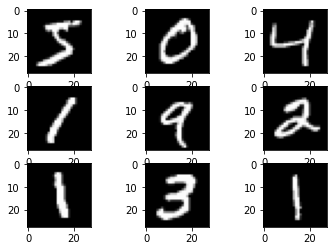

In [13]:
import matplotlib 
from matplotlib import pyplot

for _ in range(9):
    pyplot.subplot(330 + 1 + _)
    pyplot.imshow(train_x.reshape([60000,28,28])[_], cmap='gray')
pyplot.show()

### Shape of the data set

In [14]:
print(train_x.shape," ",train_y.shape)
#print(t_y.shape)
print(test_x.shape," ",test_y.shape)

(60000, 28, 28)   (60000,)
(10000, 28, 28)   (10000,)


### Mean

0


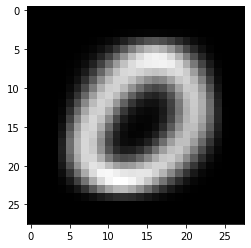

1


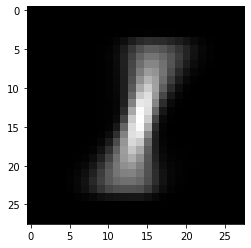

2


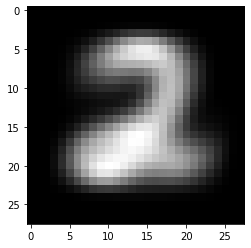

3


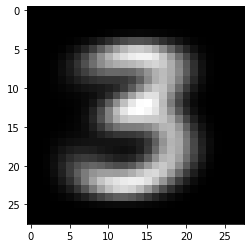

4


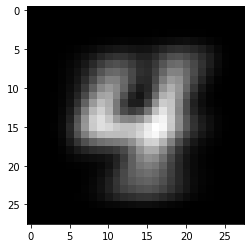

5


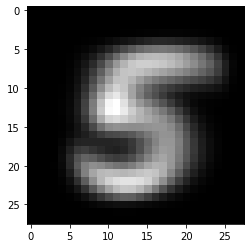

6


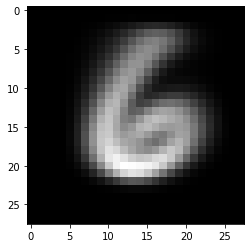

7


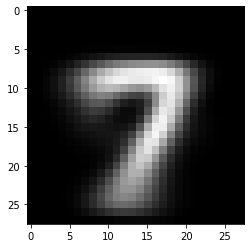

8


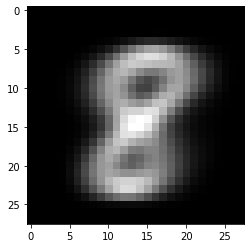

9


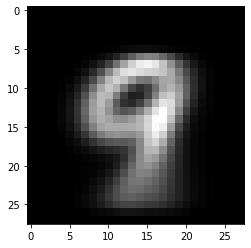

In [18]:
train_x_m = np.zeros((10, 28, 28))
#t_x_std = np.zeros((10, 28, 28)) 
x=0
while x<10:
    train_x_m[x,:,:] = np.mean(train_x[np.where(train_y == x)[0],:,:], axis=0)
    print(str(x))
    imshow(train_x_m[x,:,:], cmap='gray')
    x=x+1
    show()

### Standard deviation

0


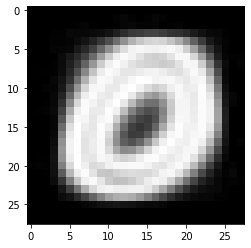

1


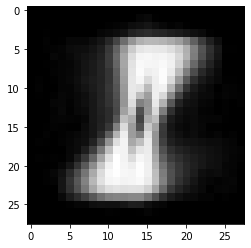

2


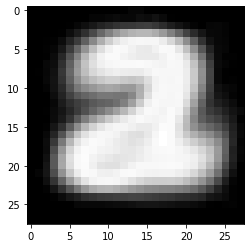

3


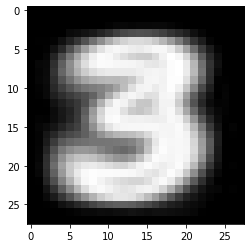

4


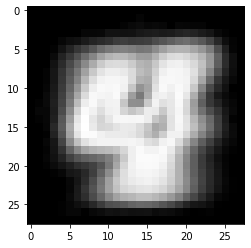

5


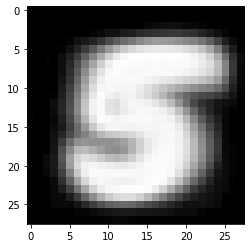

6


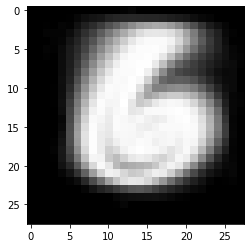

7


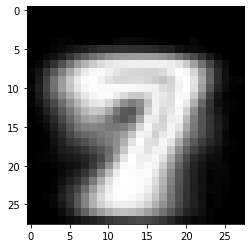

8


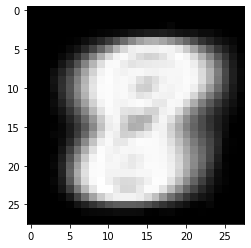

9


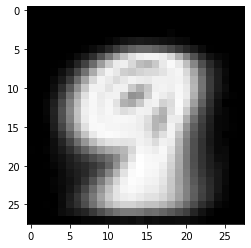

In [22]:
train_x_std = np.zeros((10, 28, 28))  #for storing standard deviation images of the mnist digits (10 digits)

x=0
while x<10:
    #x=x+1
    train_x_std[x,:,:] = np.std(train_x[np.where(train_y == x)[0],:,:], axis=0)
    print(str(x))
    imshow(train_x_std[x,:,:], cmap='gray')
    x=x+1
    show()

#### The shear transformation is used to displace pixels in a fixed direction (randomly selected up to shear_range value), by an amount proportional to its signed distance from the line that is parallel to that direction and goes through the origin. The code below can be used to shear MNIST images.

BEFORE:



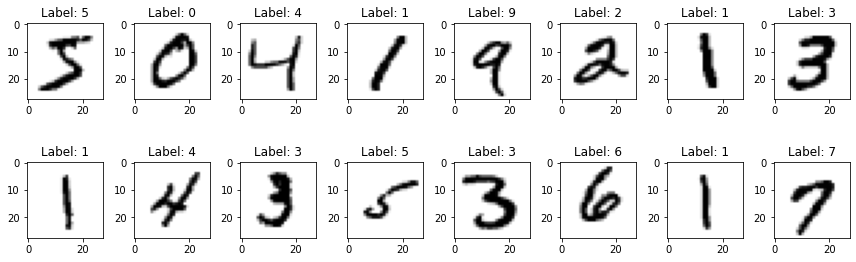

AFTER:



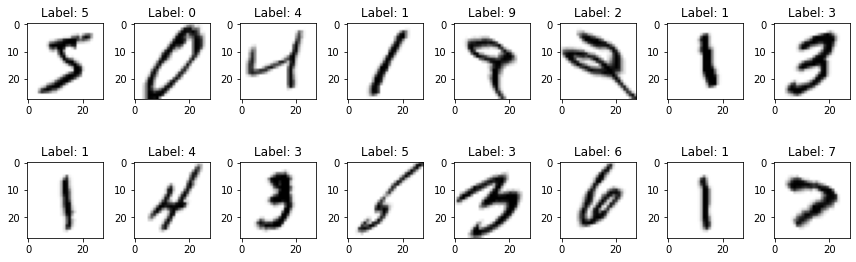

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

shear_range_val=45
# import relevant library
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# create the class object
datagen = ImageDataGenerator(shear_range=shear_range_val)
# fit the generator
datagen.fit(train_x.reshape(train_x.shape[0], 28, 28, 1))
# define number of rows & columns
num_row = 2
num_col = 8
num= num_row*num_col
# plot before
print('BEFORE:\n')
# plot images
fig1, axes1 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
     ax = axes1[i//num_col, i%num_col]
     ax.imshow(train_x[i], cmap='gray_r')
     ax.set_title('Label: {}'.format(train_y[i]))
plt.tight_layout()
plt.show()
# plot after
print('AFTER:\n')
fig2, axes2 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for X, Y in datagen.flow(train_x.reshape(train_x.shape[0], 28, 28, 1),train_y.reshape(train_y.shape[0], 1),batch_size=num,shuffle=False):
     for i in range(0, num):
          ax = axes2[i//num_col, i%num_col]
          ax.imshow(X[i].reshape(28,28), cmap='gray_r')
          ax.set_title('Label: {}'.format(int(Y[i])))
     break
plt.tight_layout()
plt.show()


#### Image zoom transformations are performed using the zoom_range argument. The zoom transform is used to randomly scale the image up or down in the vertical and/or horizontal direction. 

BEFORE:



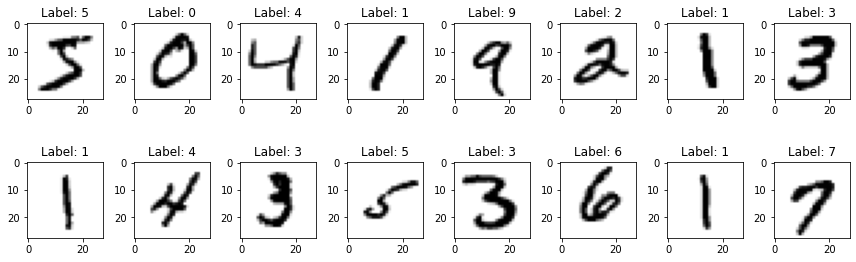

AFTER:



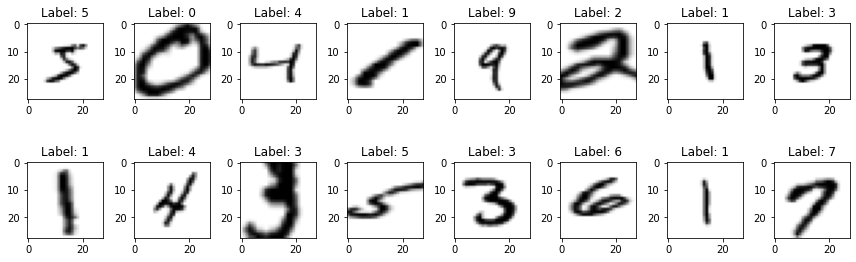

In [29]:
# specify the zoom argument
zoom_range_val=[0.5,1.5]
# import relevant library
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# create the class object
datagen = ImageDataGenerator(zoom_range=zoom_range_val)
# fit the generator
datagen.fit(train_x.reshape(train_x.shape[0], 28, 28, 1))
# define number of rows & columns
num_row = 2
num_col = 8
num= num_row*num_col
# plot before
print('BEFORE:\n')
# plot images
fig1, axes1 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
     ax = axes1[i//num_col, i%num_col]
     ax.imshow(train_x[i], cmap='gray_r')
     ax.set_title('Label: {}'.format(train_y[i]))
plt.tight_layout()
plt.show()
# plot after
print('AFTER:\n')
fig2, axes2 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for X, Y in datagen.flow(train_x.reshape(train_x.shape[0], 28, 28, 1),train_y.reshape(train_y.shape[0], 1),batch_size=num,shuffle=False):
     for i in range(0, num):
          ax = axes2[i//num_col, i%num_col]
          ax.imshow(X[i].reshape(28,28), cmap='gray_r')
          ax.set_title('Label: {}'.format(int(Y[i])))
     break
plt.tight_layout()
plt.show()

#### Image shift transformations are performed using the width_shift_range and height_shift_range arguments. These parameters are used to translate the image vertically or horizontally. The code below can be used to shift MNIST images.

BEFORE:



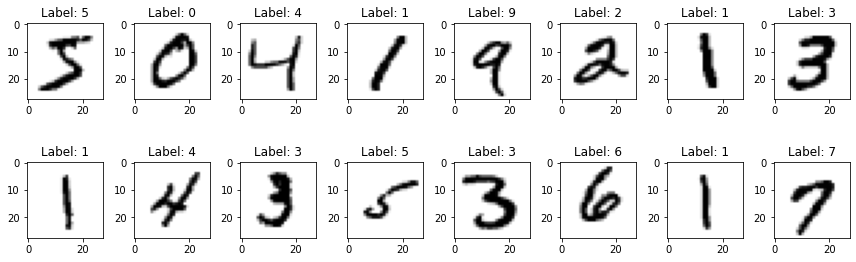

AFTER:



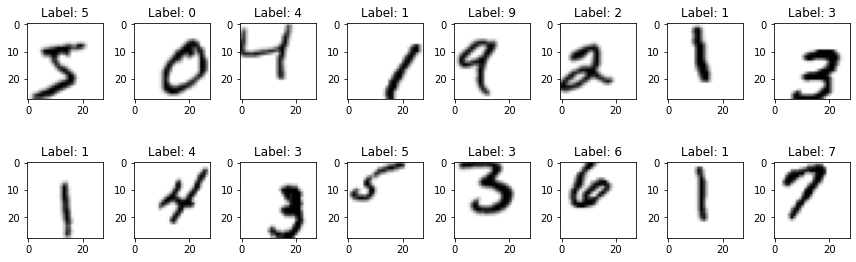

In [31]:
width_shift_val = 0.25
height_shift_val = 0.25
# import relevant library
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# create the class object
datagen = ImageDataGenerator(width_shift_range=width_shift_val, height_shift_range=height_shift_val)
# fit the generator
datagen.fit(train_x.reshape(train_x.shape[0], 28, 28, 1))
# define number of rows & columns
num_row = 2
num_col = 8
num= num_row*num_col
# plot before
print('BEFORE:\n')
# plot images
fig1, axes1 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
     ax = axes1[i//num_col, i%num_col]
     ax.imshow(train_x[i], cmap='gray_r')
     ax.set_title('Label: {}'.format(train_y[i]))
plt.tight_layout()
plt.show()
# plot after
print('AFTER:\n')
fig2, axes2 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for X, Y in datagen.flow(train_x.reshape(train_x.shape[0], 28, 28, 1),train_y.reshape(train_y.shape[0], 1),batch_size=num,shuffle=False):
     for i in range(0, num):
          ax = axes2[i//num_col, i%num_col]
          ax.imshow(X[i].reshape(28,28), cmap='gray_r')
          ax.set_title('Label: {}'.format(int(Y[i])))
     break
plt.tight_layout()
plt.show()

#### we can combine all of the previously mentioned transformations to obtain unique digit representations that can now be used to improve digit recognition model performance.

BEFORE:



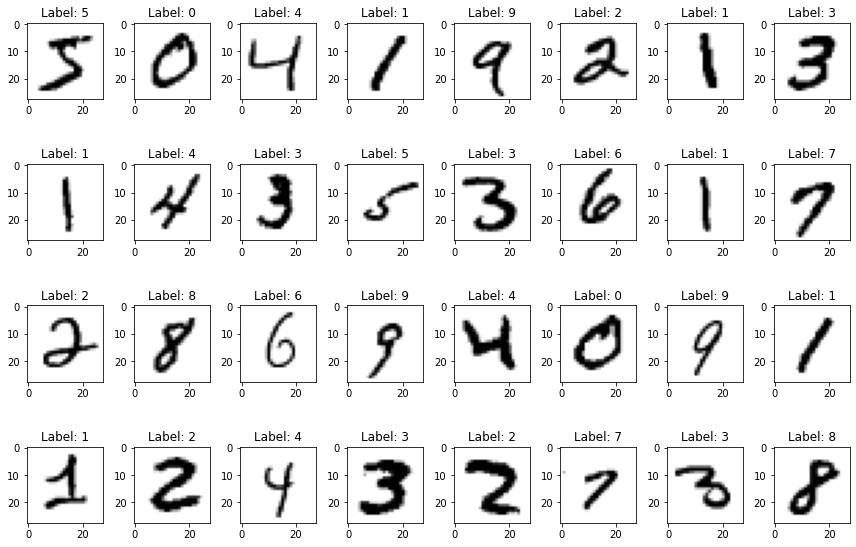

AFTER:



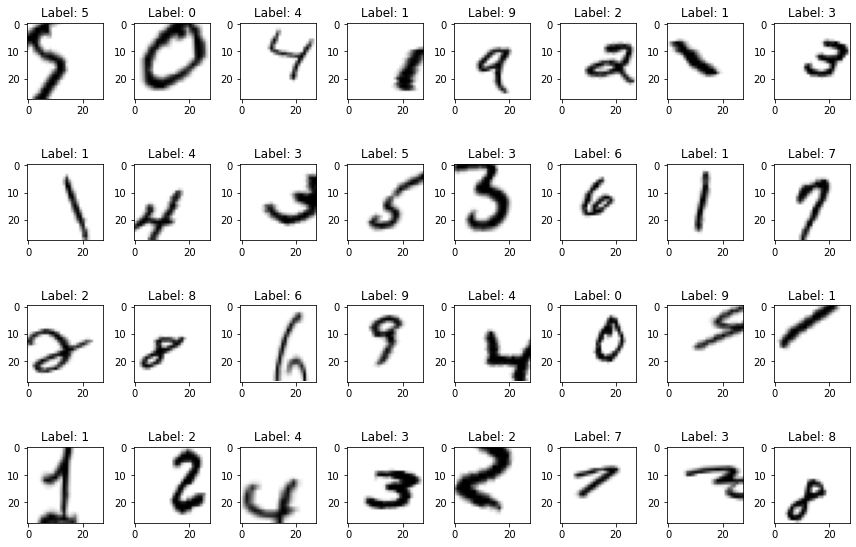

In [32]:
rotation_range_val = 30
width_shift_val = 0.25
height_shift_val = 0.25
shear_range_val=45
zoom_range_val=[0.5,1.5]
# import relevant library
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# create the class object
datagen = ImageDataGenerator(rotation_range = rotation_range_val,width_shift_range = width_shift_val,height_shift_range = height_shift_val,zoom_range=zoom_range_val,)
# fit the generator
datagen.fit(train_x.reshape(train_x.shape[0], 28, 28, 1))
# define number of rows & columns
num_row = 4
num_col = 8
num= num_row*num_col
# plot before
print('BEFORE:\n')
# plot images
fig1, axes1 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
     ax = axes1[i//num_col, i%num_col]
     ax.imshow(train_x[i], cmap='gray_r')
     ax.set_title('Label: {}'.format(train_y[i]))
plt.tight_layout()
plt.show()
# plot after
print('AFTER:\n')
fig2, axes2 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for X, Y in datagen.flow(train_x.reshape(train_x.shape[0], 28, 28, 1),train_y.reshape(train_y.shape[0], 1),batch_size=num,shuffle=False):
     for i in range(0, num):
          ax = axes2[i//num_col, i%num_col]
          ax.imshow(X[i].reshape(28,28), cmap='gray_r')
          ax.set_title('Label: {}'.format(int(Y[i])))
     break
plt.tight_layout()
plt.show()